In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'

In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns

# 모든 분기 CSV 파일 로드
file_paths = glob.glob('Data/train_data202*.csv')
dfs = []

for path in file_paths:
    df = pd.read_csv(path)
    quarter = path.split('_')[-1].split('.')[0]  # 분기 정보 추출
    df['quarter'] = quarter
    dfs.append(df)

# 모든 데이터프레임 통합
combined_df = pd.concat(dfs, ignore_index=True)

print(combined_df.info())
print(combined_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50994 entries, 0 to 50993
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    50994 non-null  int64  
 1   lat           50994 non-null  float64
 2   lng           50994 non-null  float64
 3   money         50994 non-null  float64
 4   10대_상주인구수     50994 non-null  float64
 5   10대_유동인구수     50994 non-null  float64
 6   10대_직장인구수     50994 non-null  float64
 7   20대_상주인구수     50994 non-null  float64
 8   20대_유동인구수     50994 non-null  float64
 9   20대_직장인구수     50994 non-null  float64
 10  30대_상주인구수     50994 non-null  float64
 11  30대_유동인구수     50994 non-null  float64
 12  30대_직장인구수     50994 non-null  float64
 13  40대_상주인구수     50994 non-null  float64
 14  40대_유동인구수     50994 non-null  float64
 15  40대_직장인구수     50994 non-null  float64
 16  50대_상주인구수     50994 non-null  float64
 17  50대_유동인구수     50994 non-null  float64
 18  50대_직장인구수     50994 non-nu

In [5]:
# 위도와 경도를 소수점 둘째 자리까지 반올림하여 그룹화
combined_df['lat_rounded'] = combined_df['lat'].round(2)
combined_df['lng_rounded'] = combined_df['lng'].round(2)

# 그룹화하여 평균 매출 계산
grouped_sales = combined_df.groupby(['lat_rounded', 'lng_rounded'])['money'].mean().reset_index()
grouped_sales = grouped_sales.sort_values('money', ascending=False).head(10)

print(grouped_sales)


     lat_rounded  lng_rounded         money
69         37.48       127.08  5.095489e+08
70         37.48       127.09  4.666087e+08
105        37.49       127.10  4.142621e+08
104        37.49       127.09  4.099482e+08
258        37.54       127.01  3.380007e+08
353        37.57       126.86  3.296994e+08
259        37.54       127.02  2.990803e+08
194        37.52       127.01  2.434929e+08
103        37.49       127.08  2.298184e+08
165        37.51       127.02  2.283957e+08


In [6]:
import folium
from folium.plugins import HeatMap

# 서울 중심 좌표
seoul_center = [37.5665, 126.9780]

# 지도 생성
m = folium.Map(location=seoul_center, zoom_start=11)

# 히트맵 데이터 준비
heat_data = combined_df[['lat', 'lng', 'money']].values.tolist()

# 히트맵 추가
HeatMap(heat_data).add_to(m)

# 지도 저장
m.save("seoul_sales_heatmap.html")

print("지도가 'seoul_sales_heatmap.html' 파일로 저장되었습니다.")


지도가 'seoul_sales_heatmap.html' 파일로 저장되었습니다.


In [7]:
# 매출 구분 함수 정의
def categorize_sales(money):
    if money < 50000000:
        return '5천 이하'
    elif 50000000 <= money < 100000000:
        return '5천에서 1억'
    elif 100000000 <= money < 140000000:
        return '1억에서 1억 4천'
    elif 140000000 <= money < 180000000:
        return '1억 4천에서 1억 8천'
    elif 180000000 <= money < 220000000:
        return '1억 8천에서 2억 2천'
    elif 220000000 <= money < 300000000:
        return '2억 2천에서 3억'
    else:
        return '3억 이상'

# 매출 범주를 데이터프레임에 추가
combined_df['sales_category'] = combined_df['money'].apply(categorize_sales)


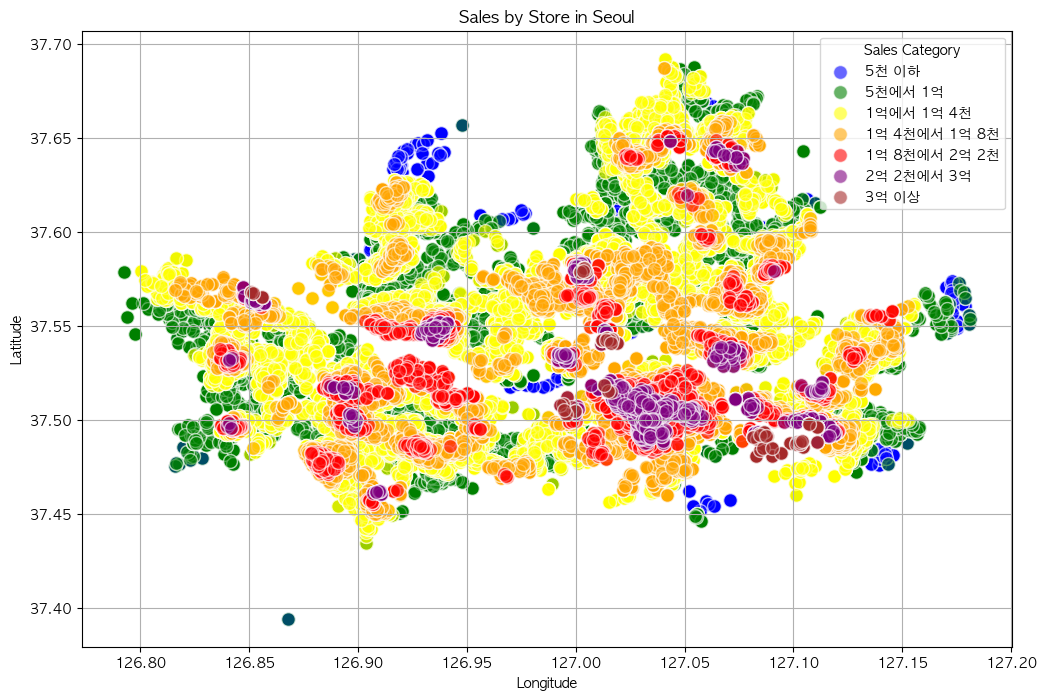

In [8]:
import matplotlib.pyplot as plt

# 매출 범주별 색상 지정
category_colors = {
    '5천 이하': 'blue',
    '5천에서 1억': 'green',
    '1억에서 1억 4천': 'yellow',
    '1억 4천에서 1억 8천': 'orange',
    '1억 8천에서 2억 2천': 'red',
    '2억 2천에서 3억': 'purple',
    '3억 이상': 'brown'
}

# 시각화
plt.figure(figsize=(12, 8))

for category, color in category_colors.items():
    category_data = combined_df[combined_df['sales_category'] == category]
    plt.scatter(
        category_data['lng'],
        category_data['lat'],
        c=color,
        label=category,
        alpha=0.6,
        edgecolors='w',
        s=100
    )

plt.title('Sales by Store in Seoul')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Sales Category')
plt.grid(True)
plt.show()


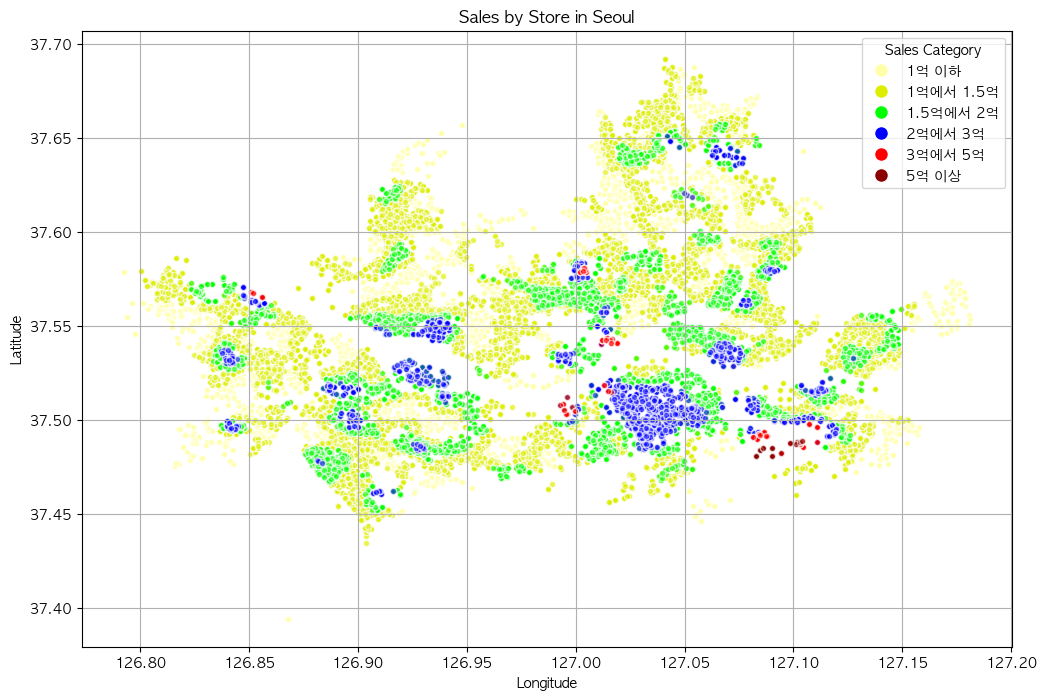

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# 예시 데이터 (실제 데이터는 glob을 통해 불러온 combined_df 사용)
# combined_df = pd.concat(dfs, ignore_index=True)

# 매출 구분 함수 정의
def categorize_sales(money):
    if money < 100000000:
        return '1억 이하'
    elif 100000000 <= money < 150000000:
        return '1억에서 1.5억'
    elif 150000000 <= money < 200000000:
        return '1.5억에서 2억'
    elif 200000000 <= money < 300000000:
        return '2억에서 3억'
    elif 300000000 <= money < 500000000:
        return '3억에서 5억'
    else:
        return '5억 이상'

# 매출 범주를 데이터프레임에 추가
combined_df['sales_category'] = combined_df['money'].apply(categorize_sales)

# 매출 범주별 색상 및 진하기 설정
color_mapping = {
    '1억 이하': '#FFFFAA',   # 하얀색에 가까운 색상
    '1억에서 1.5억': '#DDEE00', # 초록색
    '1.5억에서 2억': '#00FF00', # 노란색
    '2억에서 3억': '#0000FF', # 파란색
    '3억에서 5억': '#FF0000', # 빨간색
    '5억 이상': '#8B0000'     # 짙은 빨간색 (5억 이상)
}

# 시각화
plt.figure(figsize=(12, 8))

for category, color in color_mapping.items():
    category_data = combined_df[combined_df['sales_category'] == category]
    plt.scatter(
        category_data['lng'],
        category_data['lat'],
        c=color,
        label=category,
        alpha=0.6,
        edgecolors='w',
        s=20  # 아주 작게 설정
    )

plt.title('Sales by Store in Seoul')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

# 범례 생성 및 표시
handles = [plt.Line2D([0], [0], marker='o', color='w', label=key,
                      markerfacecolor=color, markersize=10) for key, color in color_mapping.items()]
plt.legend(handles=handles, title='Sales Category')

# 그래프 출력
plt.show()


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 매출에 따른 색상 결정 함수
def determine_color(money):
    if money < 100000000:
        return '#FFFFFF'  # 1억 이하: 하얀색
    elif 100000000 <= money < 200000000:
        return '#00FF00'  # 1억에서 2억: 초록색
    elif 200000000 <= money < 300000000:
        return '#0000FF'  # 2억에서 3억: 파란색
    elif 300000000 <= money < 500000000:
        return '#FF0000'  # 3억에서 5억: 빨간색
    else:
        return '#8B0000'  # 5억 이상: 더 진한 빨간색
    
# 매출 범주를 데이터프레임에 추가 (위에서 불러온 combined_df 사용)
combined_df['color'] = combined_df['money'].apply(determine_color)
    


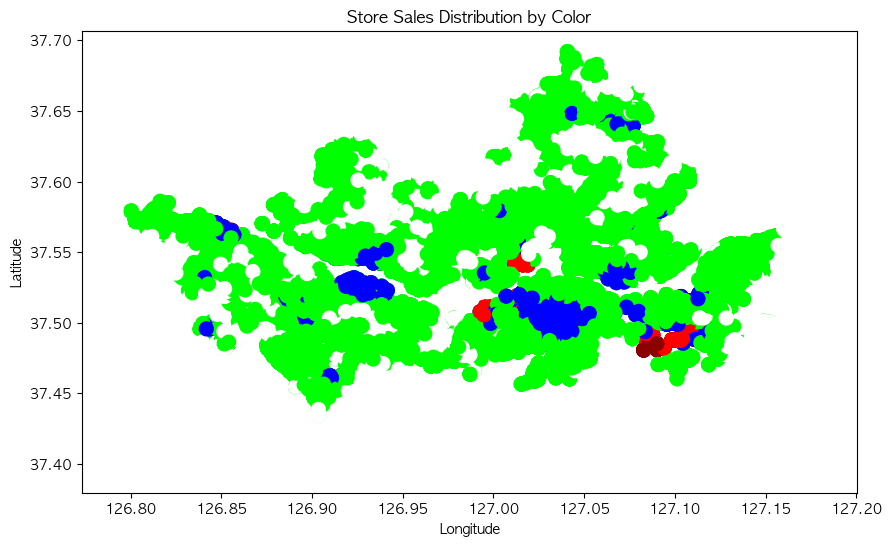

In [11]:
# 시각화
plt.figure(figsize=(10, 6))

# 산점도 그리기 (매출액에 따른 색상 적용)
plt.scatter(combined_df['lng'], combined_df['lat'], color=combined_df['color'], s=100)

# 그래프 제목 및 축 라벨 설정
plt.title('Store Sales Distribution by Color')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# 그래프 보여주기
plt.show()


In [19]:
combined_df.to_csv('combined_train_data.csv', index=False)


In [12]:
# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'

Unnamed: 0      0
lat             0
lng             0
money           0
10대_상주인구수       0
10대_유동인구수       0
10대_직장인구수       0
20대_상주인구수       0
20대_유동인구수       0
20대_직장인구수       0
30대_상주인구수       0
30대_유동인구수       0
30대_직장인구수       0
40대_상주인구수       0
40대_유동인구수       0
40대_직장인구수       0
50대_상주인구수       0
50대_유동인구수       0
50대_직장인구수       0
60대_이상_상주인구수    0
60대_이상_유동인구수    0
60대_이상_직장인구수    0
quarter         0
dtype: int64
중복 행 수: 0
         Unnamed: 0           lat           lng         money     10대_상주인구수  \
count  50994.000000  50994.000000  50994.000000  5.099400e+04  50994.000000   
mean    4249.000000     37.546756    126.986856  1.252358e+08   2944.354821   
std     2453.474009      0.050500      0.085958  4.565860e+07   1501.242734   
min        0.000000     37.394371    126.792687  1.000000e+00      1.000000   
25%     2124.000000     37.504191    126.916264  9.690109e+07   1964.255885   
50%     4249.000000     37.545861    126.995879  1.207087e+08   2759.843033   
75%     63

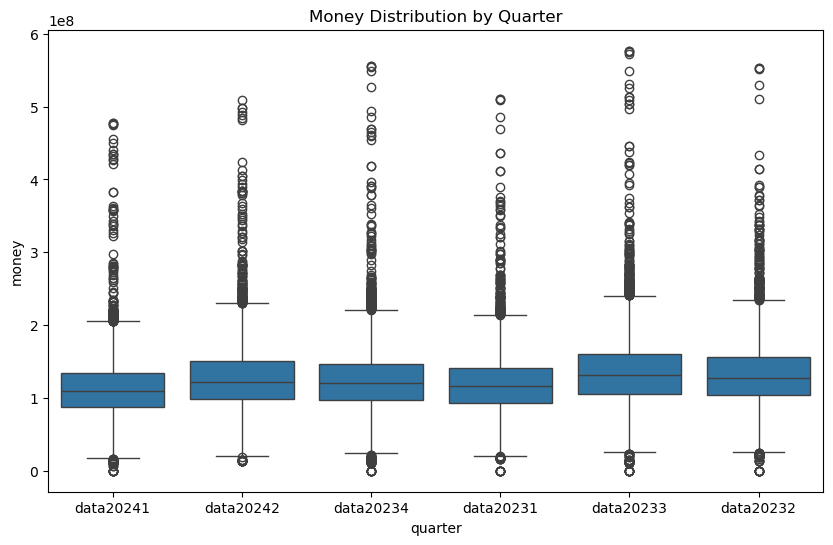

In [3]:
# 결측치 확인
print(combined_df.isnull().sum())

# 중복값 확인
print("중복 행 수:", combined_df.duplicated().sum())

# 기본 통계 확인
print(combined_df.describe())

# 이상치 확인 (예: money 컬럼)
plt.figure(figsize=(10, 6))
sns.boxplot(x='quarter', y='money', data=combined_df)
plt.title('Money Distribution by Quarter')
plt.show()


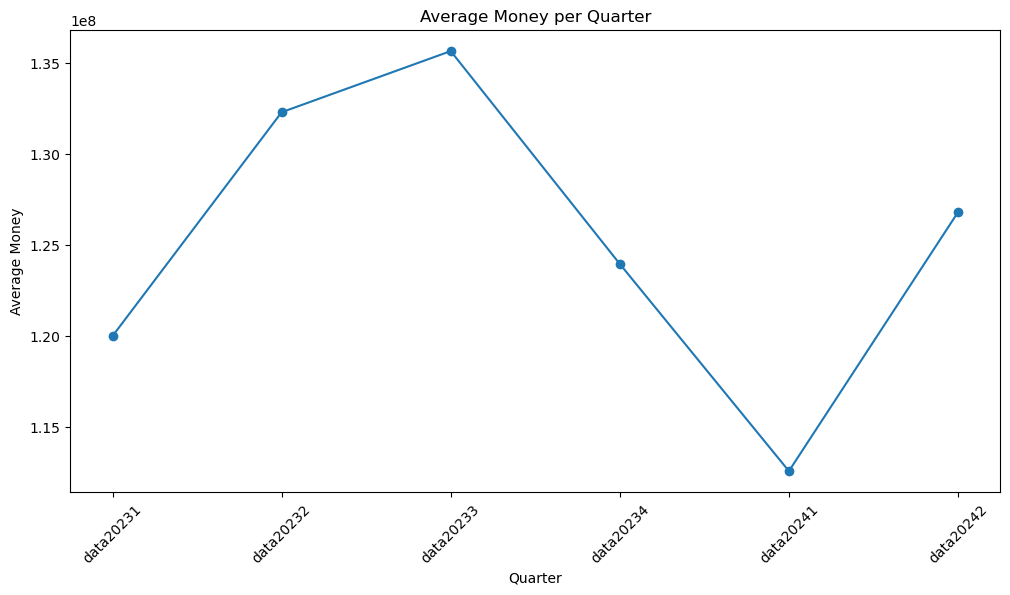

In [4]:
# 분기별 평균 매출액 계산
quarterly_avg = combined_df.groupby('quarter')['money'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(quarterly_avg['quarter'], quarterly_avg['money'], marker='o')
plt.title('Average Money per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Average Money')
plt.xticks(rotation=45)
plt.show()


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/var/folders/5r/fgj26ncd2y9_f_q31f04nxvc0000gp/T/ipykernel_1499/1613574849.py:2: SyntaxWarning: invalid escape sequence '\d'
  combined_df['quarter_num'] = combined_df['quarter'].str.extract('(\d+)').astype(int)
/Users/tj2/anaconda/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.draw()
/Users/tj2/anaconda/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


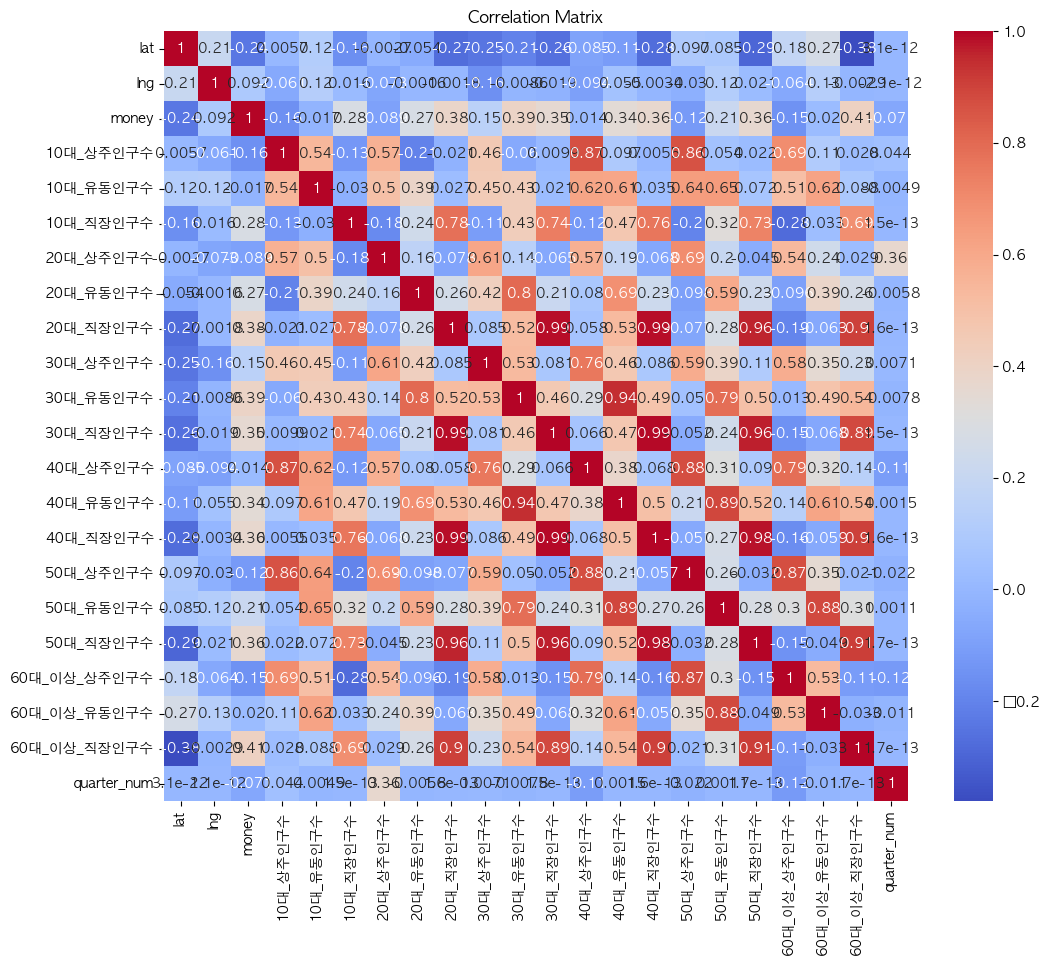

In [13]:
# quarter 열에서 숫자만 추출하여 새로운 열로 저장
combined_df['quarter_num'] = combined_df['quarter'].str.extract('(\d+)').astype(int)

# quarter_num 열을 포함하지 않고 상관관계 계산
corr_matrix = combined_df.drop(columns=['quarter', 'Unnamed: 0']).corr()

# 상관관계 히트맵 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


/Users/tj2/anaconda/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.draw()
/Users/tj2/anaconda/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


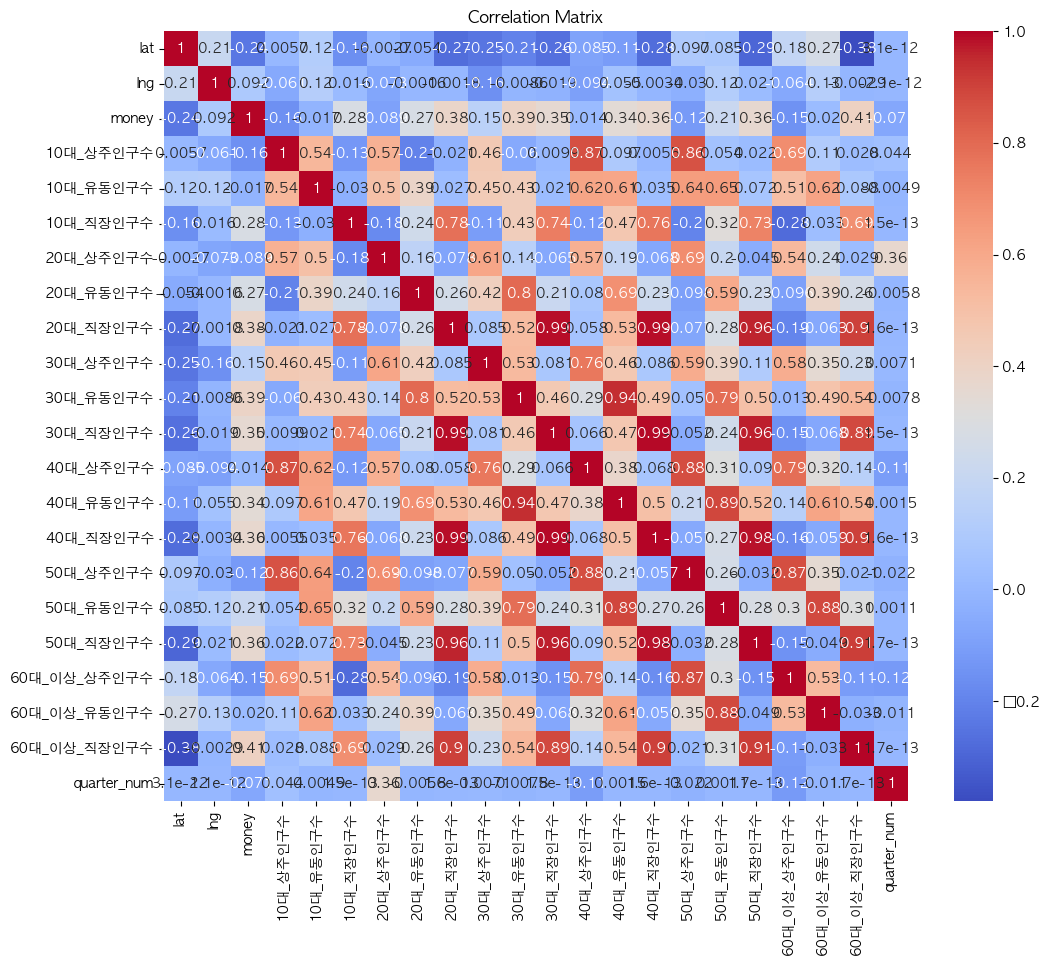

In [14]:
# quarter 열을 제거하고 상관관계 계산
corr_matrix = combined_df.drop(columns=['quarter', 'Unnamed: 0']).corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


/Users/tj2/anaconda/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


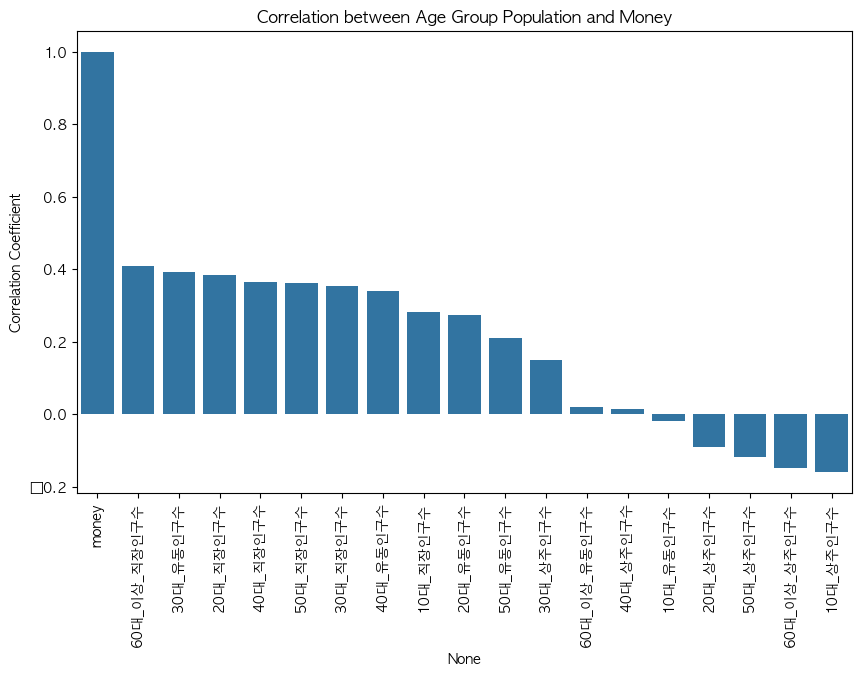

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# 연령대별 인구 특성과 매출액 간의 상관관계만 추출
age_columns = ['10대_상주인구수', '10대_유동인구수', '10대_직장인구수',
               '20대_상주인구수', '20대_유동인구수', '20대_직장인구수',
               '30대_상주인구수', '30대_유동인구수', '30대_직장인구수',
               '40대_상주인구수', '40대_유동인구수', '40대_직장인구수',
               '50대_상주인구수', '50대_유동인구수', '50대_직장인구수',
               '60대_이상_상주인구수', '60대_이상_유동인구수', '60대_이상_직장인구수']

# 매출액과 각 연령대 변수들 간의 상관계수를 추출
corr_with_money = combined_df[age_columns + ['money']].corr()['money'].sort_values(ascending=False)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_with_money.index, y=corr_with_money.values)
plt.xticks(rotation=90)
plt.title('Correlation between Age Group Population and Money')
plt.ylabel('Correlation Coefficient')
plt.show()


In [20]:
# 연령대별 상주인구와 매출액 간의 상관계수 계산
age_columns_stay = ['10대_상주인구수', '20대_상주인구수', '30대_상주인구수', 
                    '40대_상주인구수', '50대_상주인구수', '60대_이상_상주인구수']

corr_with_money_stay = combined_df[age_columns_stay + ['money']].corr()['money'].sort_values(ascending=False)

# 상관계수 출력
print("연령대별 상주인구와 매출액 간의 상관계수:")
print(corr_with_money_stay)

연령대별 상주인구와 매출액 간의 상관계수:
money           1.000000
30대_상주인구수       0.149456
40대_상주인구수       0.014125
20대_상주인구수      -0.089038
50대_상주인구수      -0.118869
60대_이상_상주인구수   -0.148885
10대_상주인구수      -0.158376
Name: money, dtype: float64


/Users/tj2/anaconda/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


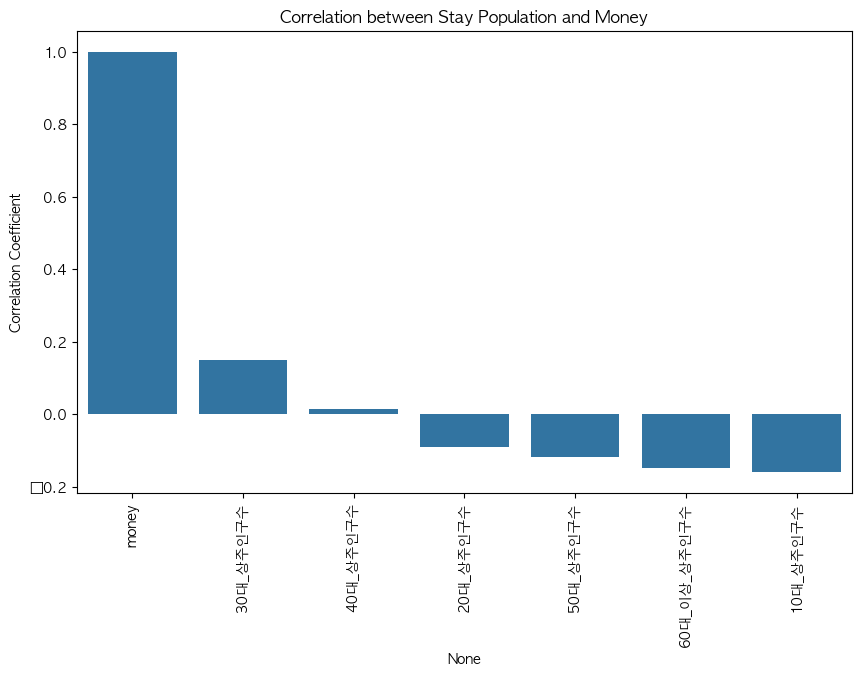

In [21]:
# 연령대별 상주인구와 매출액 간의 상관계수를 바 차트로 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_with_money_stay.index, y=corr_with_money_stay.values)
plt.xticks(rotation=90)
plt.title('Correlation between Stay Population and Money')
plt.ylabel('Correlation Coefficient')
plt.show()

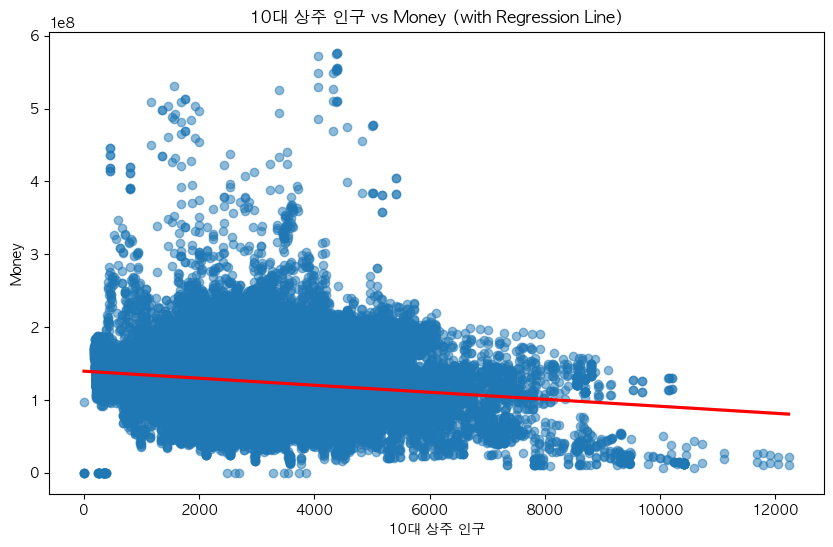

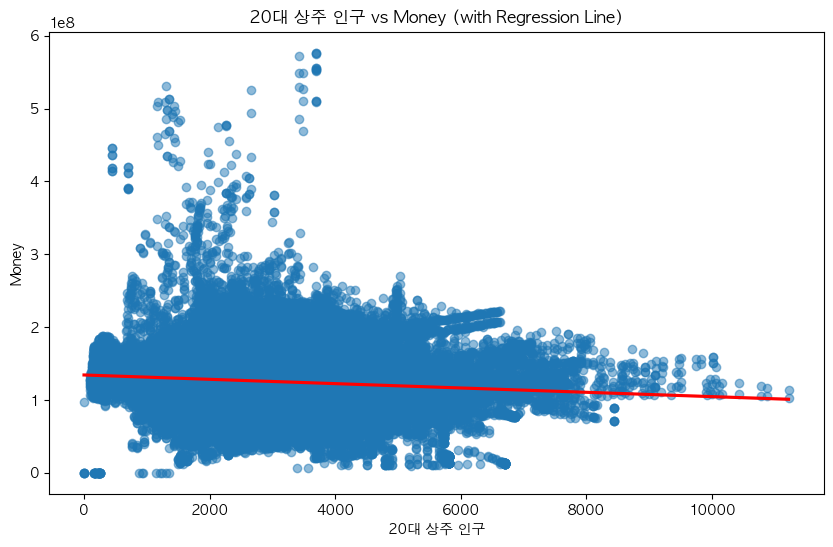

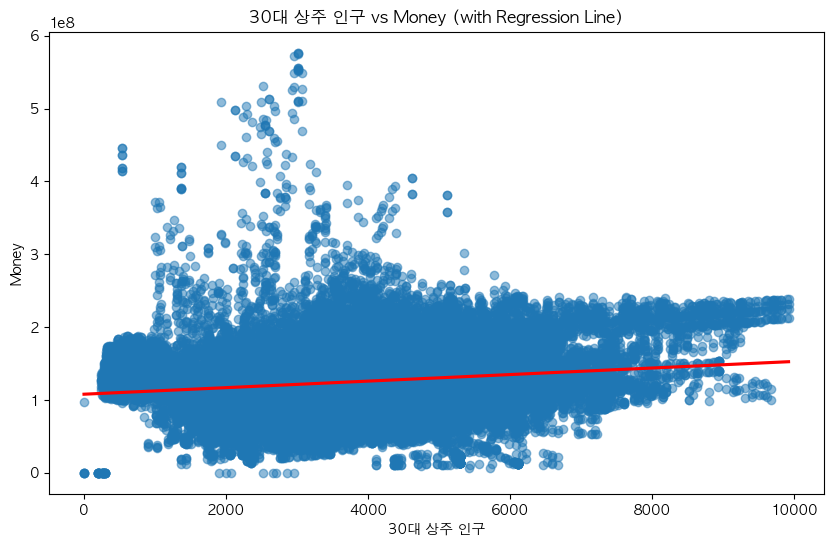

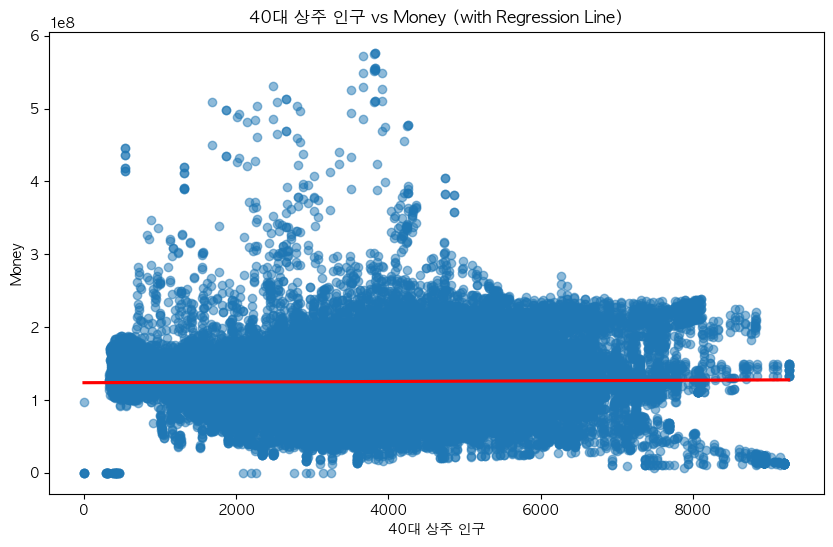

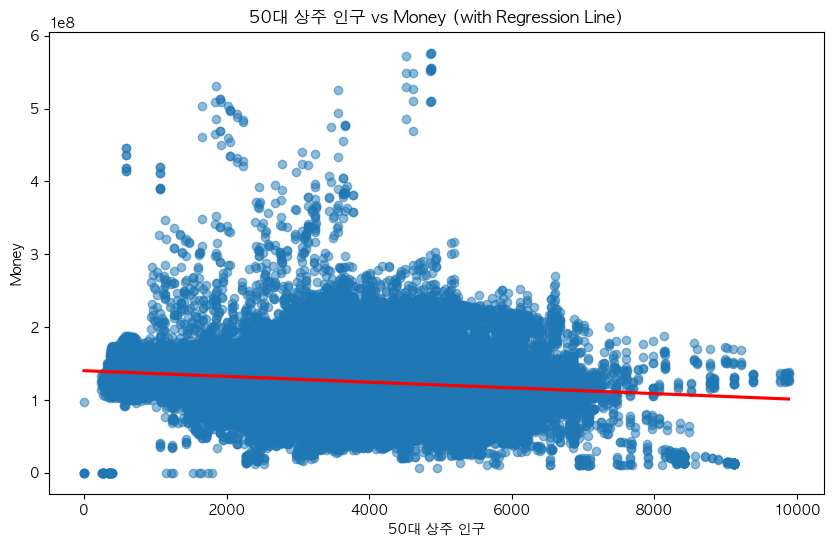

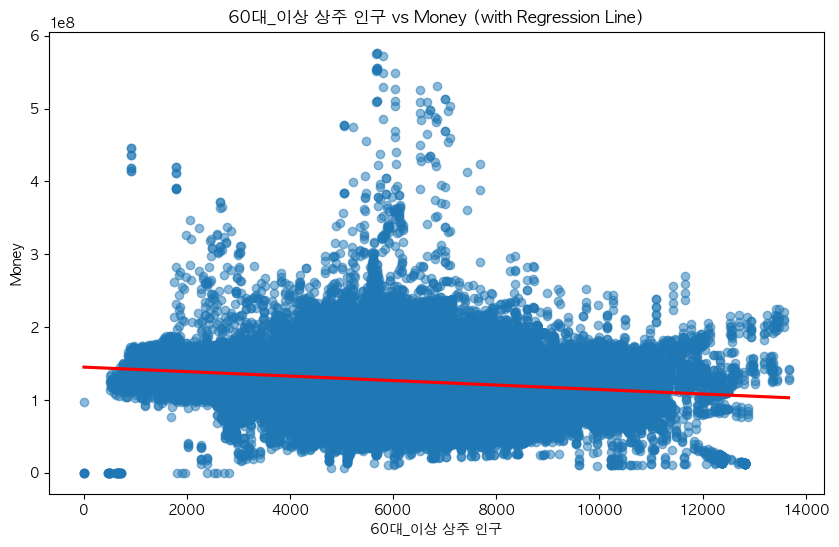

In [23]:
# 연령대별 상주 인구와 매출액 간 회귀선을 추가한 산점도 그리기
for age in age_groups_stay:
    plt.figure(figsize=(10, 6))
    sns.regplot(x=combined_df[f'{age}_상주인구수'], y=combined_df['money'], scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
    plt.title(f'{age} 상주 인구 vs Money (with Regression Line)')
    plt.xlabel(f'{age} 상주 인구')
    plt.ylabel('Money')
    plt.show()

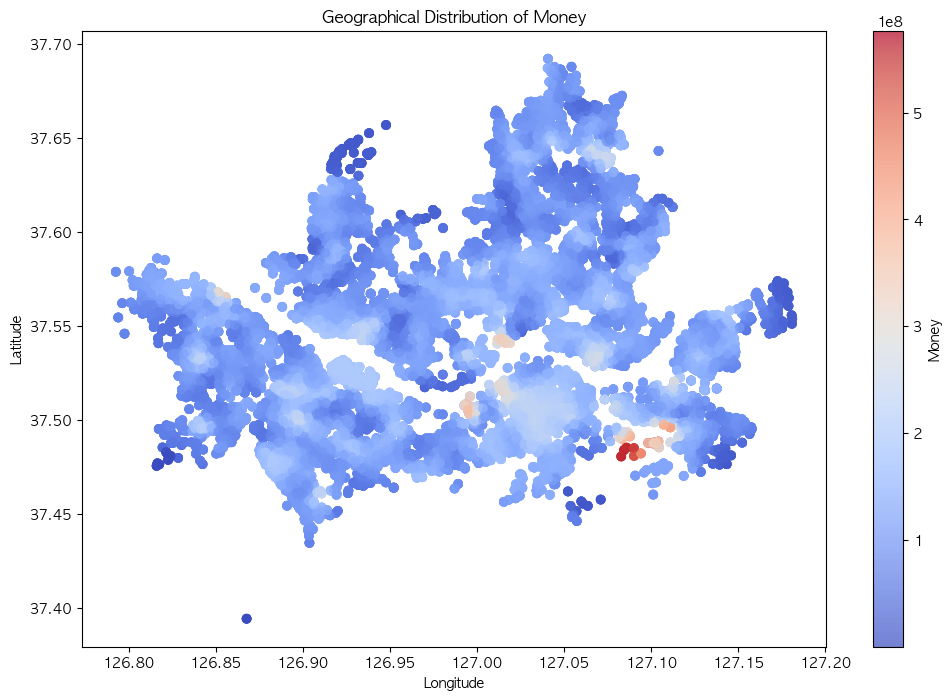

In [15]:
plt.figure(figsize=(12, 8))
plt.scatter(combined_df['lng'], combined_df['lat'], c=combined_df['money'], cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Money')
plt.title('Geographical Distribution of Money')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


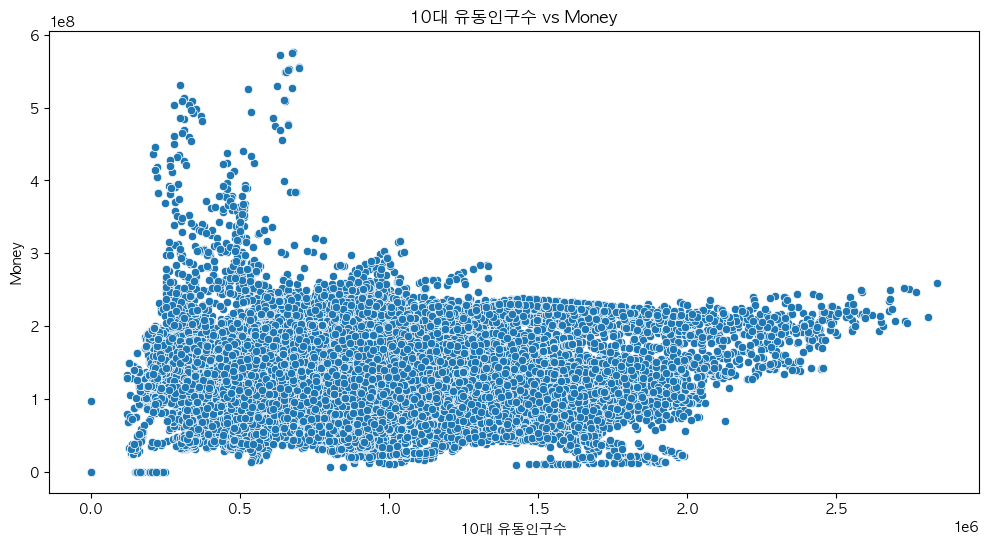

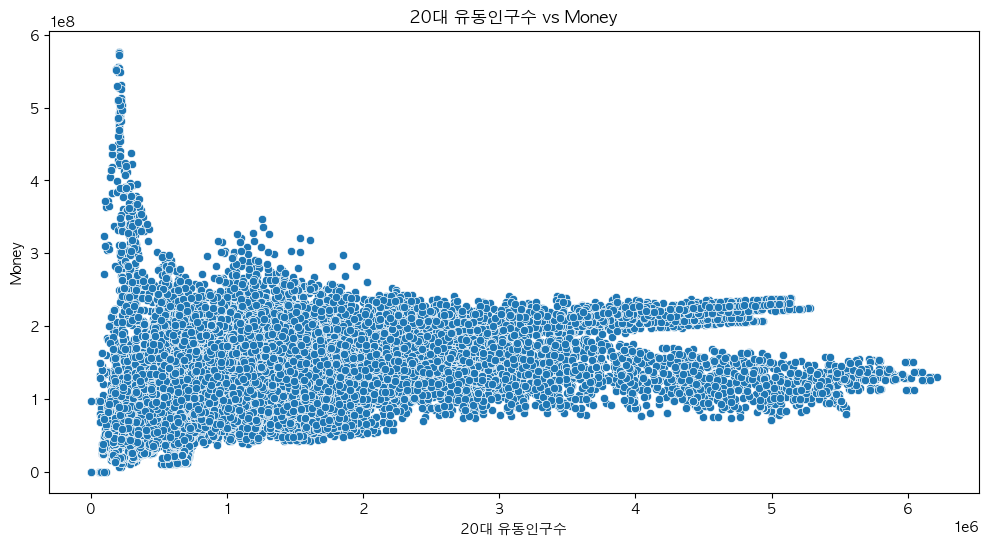

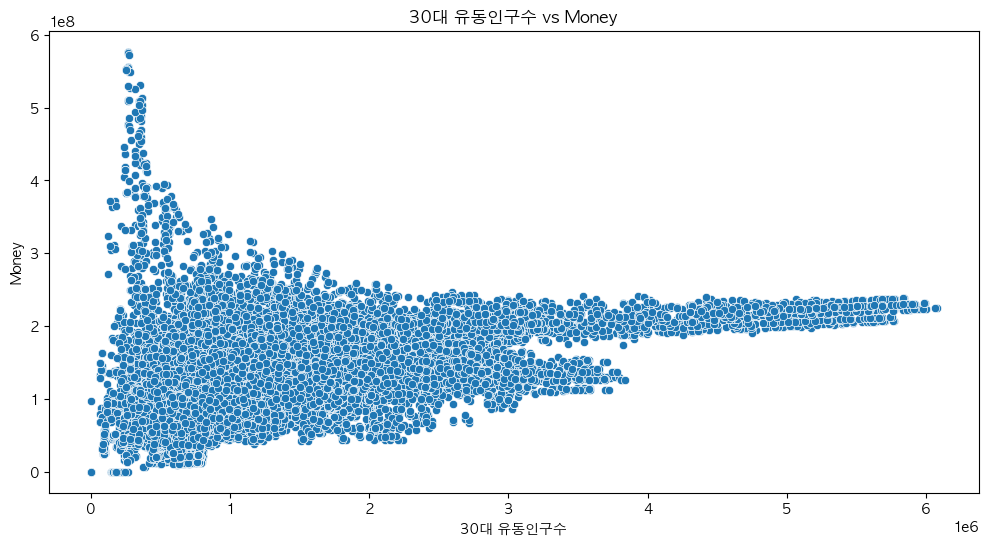

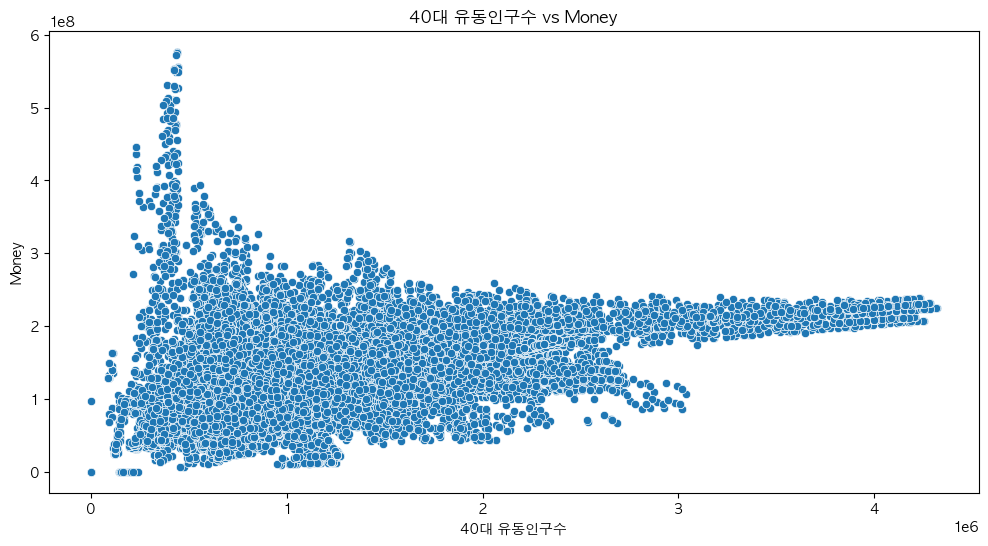

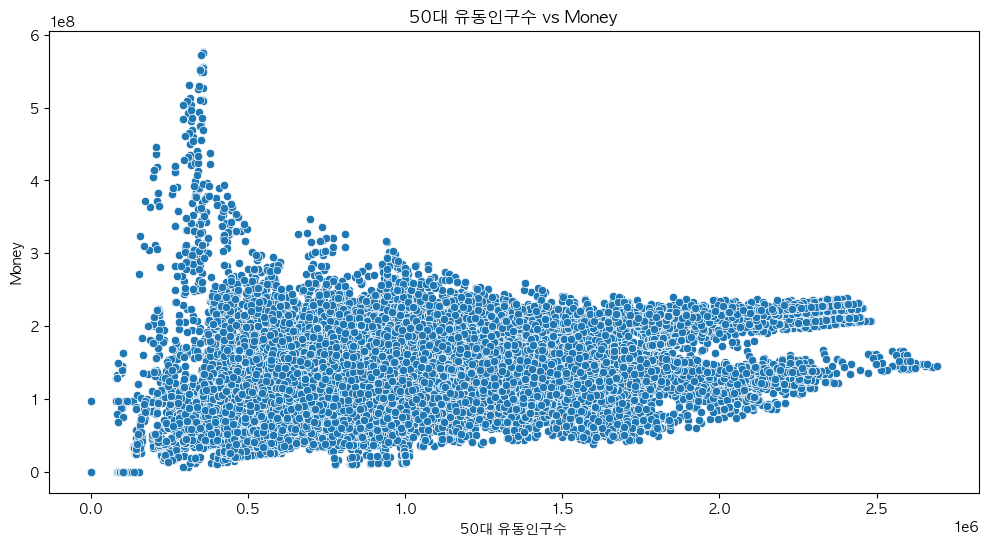

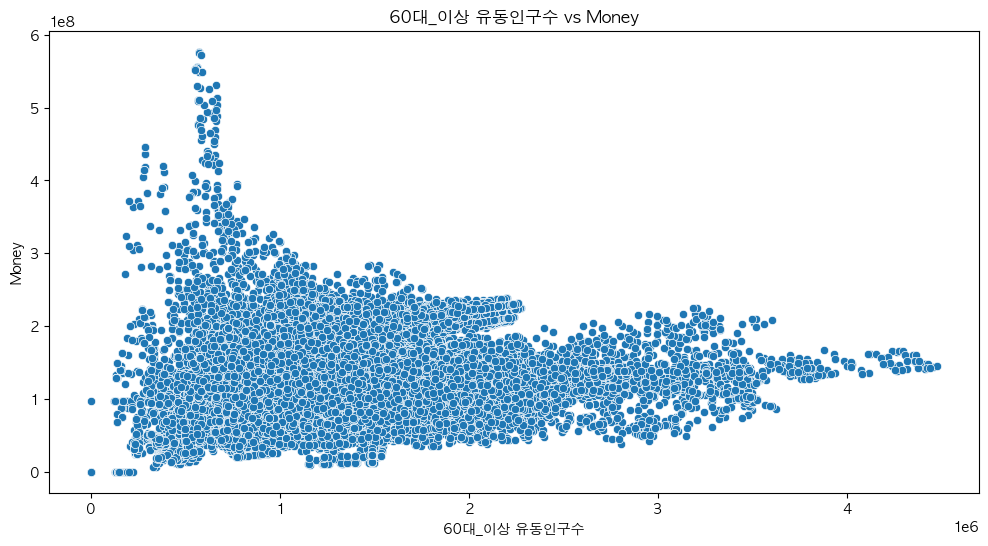

In [16]:
age_groups = ['10대', '20대', '30대', '40대', '50대', '60대_이상']

for age in age_groups:
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x=combined_df[f'{age}_유동인구수'], y=combined_df['money'])
    plt.title(f'{age} 유동인구수 vs Money')
    plt.xlabel(f'{age} 유동인구수')
    plt.ylabel('Money')
    plt.show()


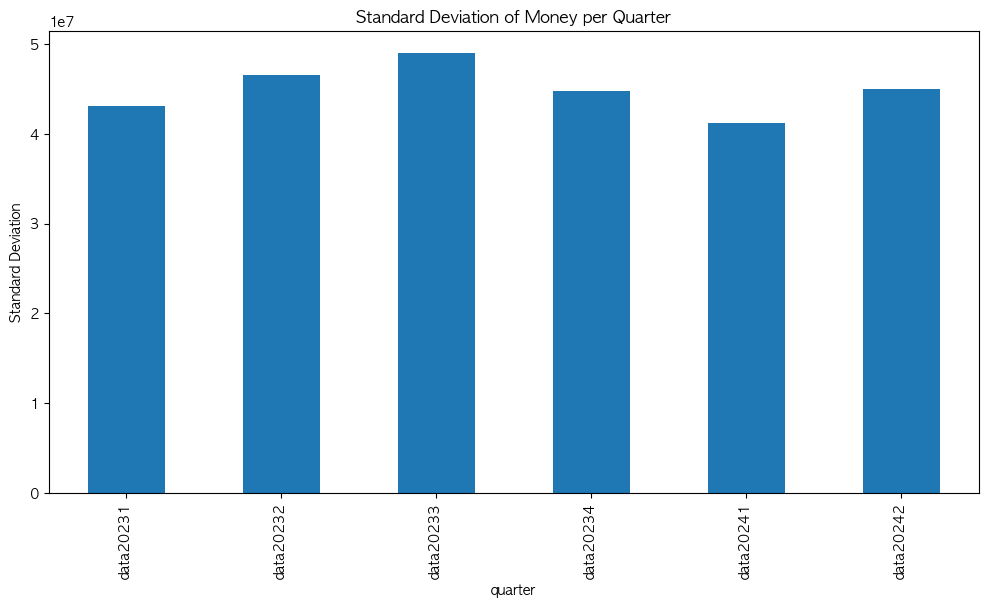

In [17]:
# 각 분기별 money의 표준편차 계산
std_per_quarter = combined_df.groupby('quarter')['money'].std()

plt.figure(figsize=(12, 6))
std_per_quarter.plot(kind='bar')
plt.title('Standard Deviation of Money per Quarter')
plt.ylabel('Standard Deviation')
plt.show()


In [24]:
# 연령대별 상주인구와 매출액 간의 상관계수 계산
age_columns_stay = ['10대_상주인구수', '20대_상주인구수', '30대_상주인구수', 
                    '40대_상주인구수', '50대_상주인구수', '60대_이상_상주인구수']

corr_with_money_stay = combined_df[age_columns_stay + ['money']].corr()['money'].sort_values(ascending=False)

# 상관계수 출력
print("연령대별 상주인구와 매출액 간의 상관계수:")
print(corr_with_money_stay)

연령대별 상주인구와 매출액 간의 상관계수:
money           1.000000
30대_상주인구수       0.149456
40대_상주인구수       0.014125
20대_상주인구수      -0.089038
50대_상주인구수      -0.118869
60대_이상_상주인구수   -0.148885
10대_상주인구수      -0.158376
Name: money, dtype: float64


/Users/tj2/anaconda/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


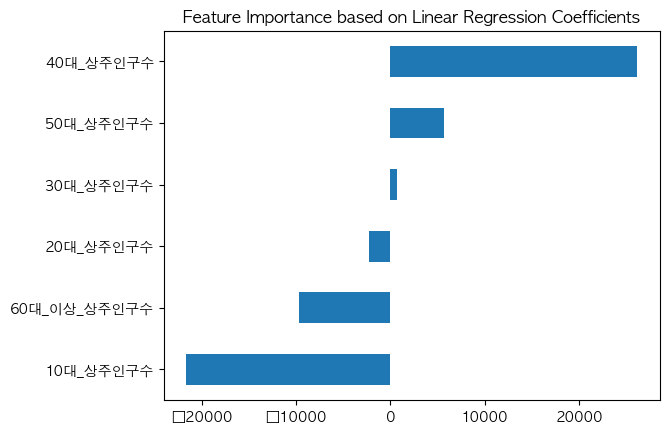

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 입력 변수: 연령층별 인구 데이터
X = combined_df[age_columns_stay]
y = combined_df['money']

# 데이터 분할 (훈련/테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 회귀 계수 출력 (각 변수의 중요도)
coefficients = pd.Series(model.coef_, index=X.columns)
coefficients.sort_values().plot(kind='barh')
plt.title('Feature Importance based on Linear Regression Coefficients')
plt.show()

In [28]:
# 필요한 열만 선택 (상주인구 및 매출액)
age_columns_stay = ['10대_상주인구수', '20대_상주인구수', '30대_상주인구수',
                    '40대_상주인구수', '50대_상주인구수', '60대_이상_상주인구수']

X_stay = combined_df[age_columns_stay]
y = combined_df['money']

In [30]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 표준화
scaler = StandardScaler()
X_stay_scaled = scaler.fit_transform(X_stay)

# 표준화된 데이터프레임 생성
scaled_df = pd.DataFrame(X_stay_scaled, columns=age_columns_stay)
scaled_df['money'] = y.values

# 결과 확인
print(scaled_df)


       10대_상주인구수  20대_상주인구수  30대_상주인구수  40대_상주인구수  50대_상주인구수  60대_이상_상주인구수  \
0       1.170726   0.287747   0.164598   0.593884   0.598808      0.115082   
1       0.975631  -0.472916  -0.940693   0.020913  -0.133310     -0.662846   
2       0.521920   0.038093  -0.040734   0.081742   0.171798     -0.382767   
3       0.548906  -0.072726  -0.191929   0.005864   0.145583     -0.476029   
4       0.144344   0.001121  -0.026067  -0.128155  -0.041622     -0.577296   
...          ...        ...        ...        ...        ...           ...   
50989  -0.624049  -0.564452   2.028166   1.473637  -0.061636     -0.184550   
50990  -0.107358  -0.143392   0.184429   0.027785  -0.081116     -0.095212   
50991  -1.014476  -1.140833   0.774829  -0.438745  -0.792168     -0.715396   
50992  -0.729352  -0.622530   1.270858   0.392575  -0.453184     -0.336591   
50993   0.253315  -0.056356  -0.082361   0.310980   0.245132      0.022288   

              money  
0      1.228881e+08  
1      9.003200e+07

/Users/tj2/anaconda/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


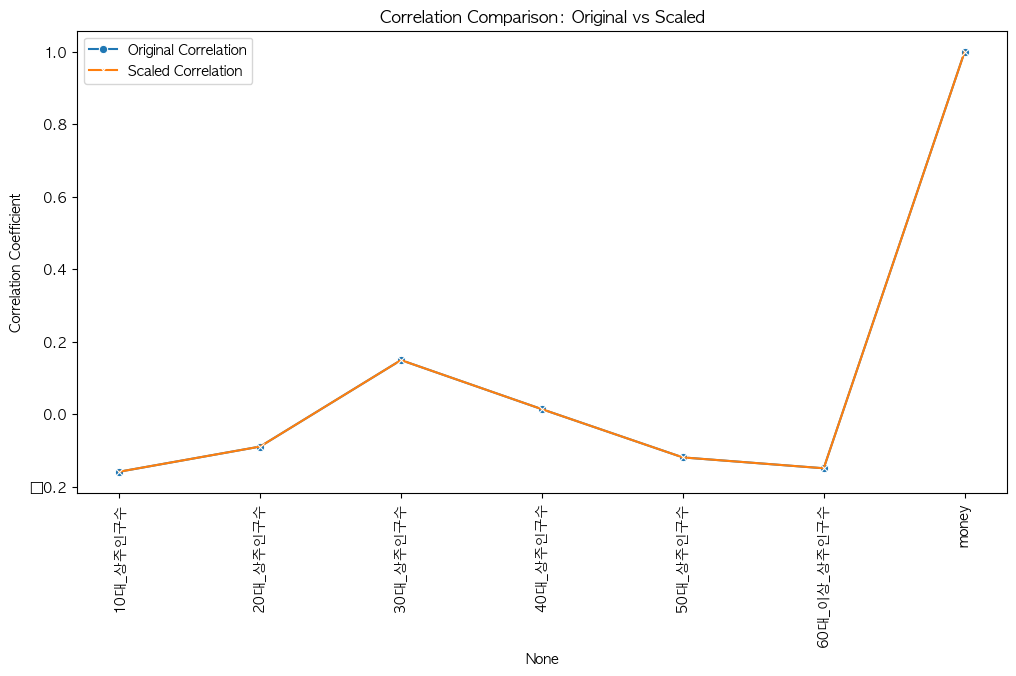

Original Correlation:
 10대_상주인구수      -0.158376
20대_상주인구수      -0.089038
30대_상주인구수       0.149456
40대_상주인구수       0.014125
50대_상주인구수      -0.118869
60대_이상_상주인구수   -0.148885
money           1.000000
Name: money, dtype: float64
Scaled Correlation:
 10대_상주인구수      -0.158376
20대_상주인구수      -0.089038
30대_상주인구수       0.149456
40대_상주인구수       0.014125
50대_상주인구수      -0.118869
60대_이상_상주인구수   -0.148885
money           1.000000
Name: money, dtype: float64


In [31]:
# 상관관계 계산 (표준화 이전)
original_corr = combined_df[age_columns_stay + ['money']].corr()['money']

# 상관관계 계산 (표준화 이후)
scaled_corr = scaled_df.corr()['money']

# 시각화: 원본과 표준화된 상관관계 비교
plt.figure(figsize=(12, 6))
sns.lineplot(x=original_corr.index, y=original_corr.values, label='Original Correlation', marker='o')
sns.lineplot(x=scaled_corr.index, y=scaled_corr.values, label='Scaled Correlation', marker='x')
plt.xticks(rotation=90)
plt.title('Correlation Comparison: Original vs Scaled')
plt.ylabel('Correlation Coefficient')
plt.legend()
plt.show()

print("Original Correlation:\n", original_corr)
print("Scaled Correlation:\n", scaled_corr)


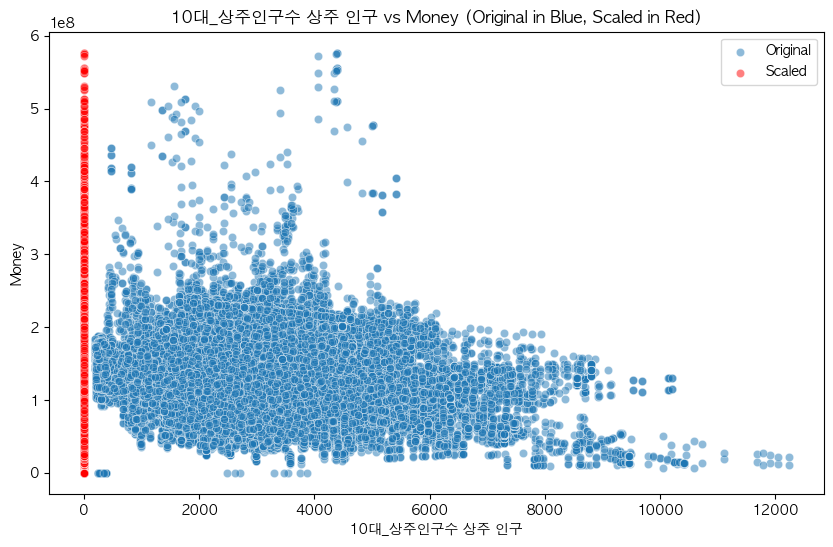

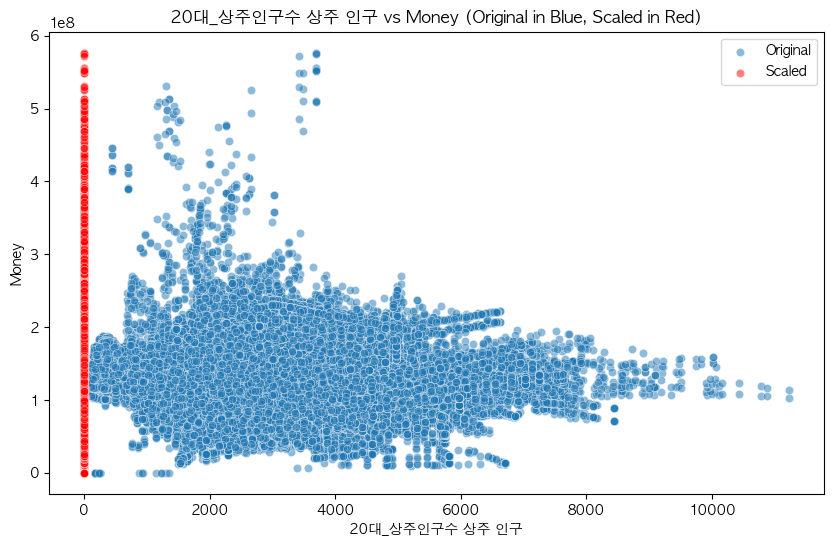

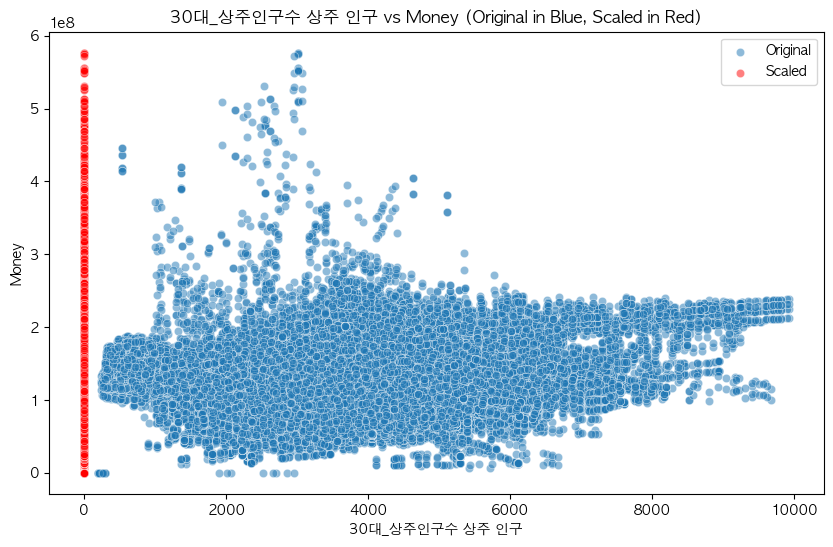

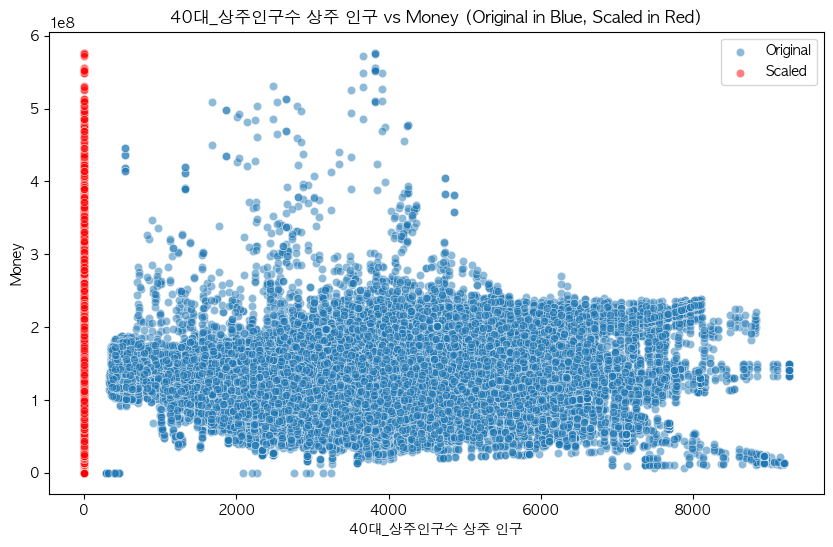

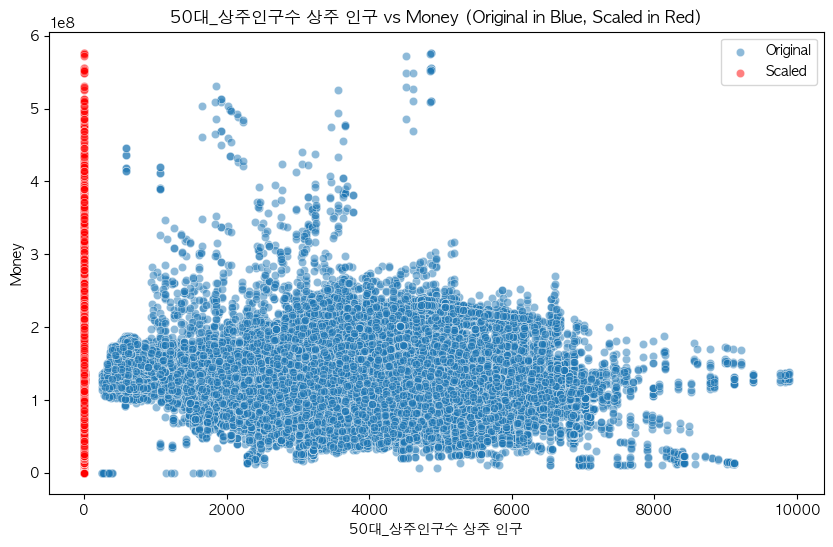

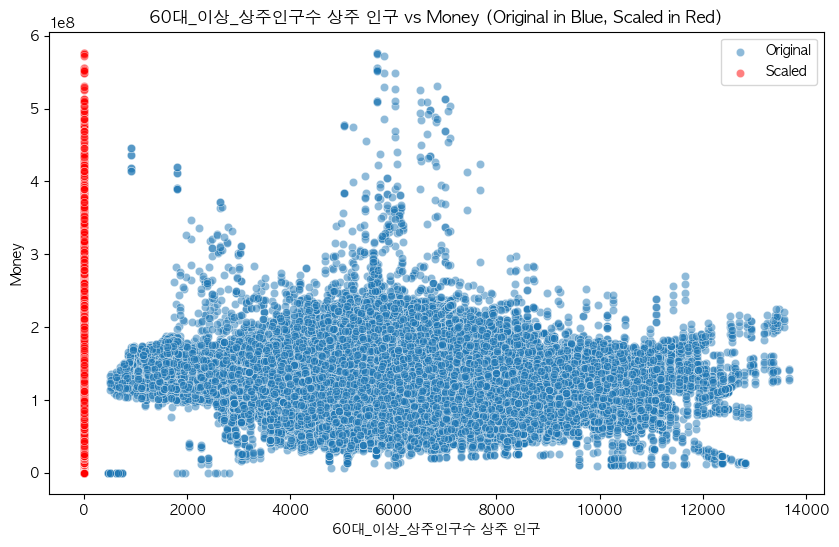

In [32]:
# 산점도 분석: 원본과 표준화된 데이터를 함께 비교
for age in age_columns_stay:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=combined_df[age], y=combined_df['money'], alpha=0.5)
    sns.scatterplot(x=scaled_df[age], y=scaled_df['money'], alpha=0.5, color='red')
    plt.title(f'{age} 상주 인구 vs Money (Original in Blue, Scaled in Red)')
    plt.xlabel(f'{age} 상주 인구')
    plt.ylabel('Money')
    plt.legend(['Original', 'Scaled'])
    plt.show()
